In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("training_set.tsv", sep='\t', encoding="ISO-8859-1")
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,5,"In this memoir of Narciso Rodriguez, @PERSON3'...",2,2,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5,Throughout the excerpt from Home the Blueprint...,2,2,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5,The mood the author created in the memoir is l...,3,3,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5,The mood created by the author is showing how ...,1,0,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,The mood created in the memoir is happiness an...,2,3,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,1805.000000,1805.0,1805.000000,1805.000000,0.0,1805.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,903.000000,5.0,2.221053,2.221607,NaN,2.408864,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,521.202936,0.0,0.988515,0.992030,NaN,0.970821,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,5.0,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,452.000000,5.0,2.000000,2.000000,NaN,2.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,903.000000,5.0,2.000000,2.000000,NaN,2.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1354.000000,5.0,3.000000,3.000000,NaN,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1805.000000,5.0,4.000000,4.000000,NaN,4.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        1805 non-null   int64  
 1   essay_set       1805 non-null   int64  
 2   essay           1805 non-null   object 
 3   rater1_domain1  1805 non-null   int64  
 4   rater2_domain1  1805 non-null   int64  
 5   rater3_domain1  0 non-null      float64
 6   domain1_score   1805 non-null   int64  
 7   rater1_domain2  0 non-null      float64
 8   rater2_domain2  0 non-null      float64
 9   domain2_score   0 non-null      float64
 10  rater1_trait1   0 non-null      float64
 11  rater1_trait2   0 non-null      float64
 12  rater1_trait3   0 non-null      float64
 13  rater1_trait4   0 non-null      float64
 14  rater1_trait5   0 non-null      float64
 15  rater1_trait6   0 non-null      float64
 16  rater2_trait1   0 non-null      float64
 17  rater2_trait2   0 non-null      f

In [5]:
df.shape

(1805, 28)

In [6]:
df.isnull().sum()

essay_id             0
essay_set            0
essay                0
rater1_domain1       0
rater2_domain1       0
rater3_domain1    1805
domain1_score        0
rater1_domain2    1805
rater2_domain2    1805
domain2_score     1805
rater1_trait1     1805
rater1_trait2     1805
rater1_trait3     1805
rater1_trait4     1805
rater1_trait5     1805
rater1_trait6     1805
rater2_trait1     1805
rater2_trait2     1805
rater2_trait3     1805
rater2_trait4     1805
rater2_trait5     1805
rater2_trait6     1805
rater3_trait1     1805
rater3_trait2     1805
rater3_trait3     1805
rater3_trait4     1805
rater3_trait5     1805
rater3_trait6     1805
dtype: int64

In [7]:
df.dropna(axis=1, inplace=True)

In [8]:
df.shape

(1805, 6)

In [9]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,5,"In this memoir of Narciso Rodriguez, @PERSON3'...",2,2,2
1,2,5,Throughout the excerpt from Home the Blueprint...,2,2,2
2,3,5,The mood the author created in the memoir is l...,3,3,3
3,4,5,The mood created by the author is showing how ...,1,0,1
4,5,5,The mood created in the memoir is happiness an...,2,3,3


In [10]:
df['essay_set'].value_counts()

5    1805
Name: essay_set, dtype: int64

In [11]:
df.drop(columns=['rater1_domain1', 'rater2_domain1'], inplace=True, axis=1)

In [12]:
df.shape

(1805, 4)

In [13]:
df.head()

,essay_id,essay_set,essay,domain1_score
0,1,5,"In this memoir of Narciso Rodriguez, @PERSON3'...",2
1,2,5,Throughout the excerpt from Home the Blueprint...,2
2,3,5,The mood the author created in the memoir is l...,3
3,4,5,The mood created by the author is showing how ...,1
4,5,5,The mood created in the memoir is happiness an...,3


In [14]:
min(df['domain1_score'])

0

In [15]:
max(df['domain1_score'])

4

In [16]:
df.skew()

essay_id         0.000000
essay_set        0.000000
domain1_score   -0.040572
dtype: float64

In [17]:
df.kurtosis()

essay_id        -1.20000
essay_set        0.00000
domain1_score   -0.66361
dtype: float64

/var/folders/kn/gnm3d9hn21d8t3q08syhwsdw0000gp/T/ipykernel_6672/1034205877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['domain1_score'])


<Axes: xlabel='domain1_score', ylabel='Density'>

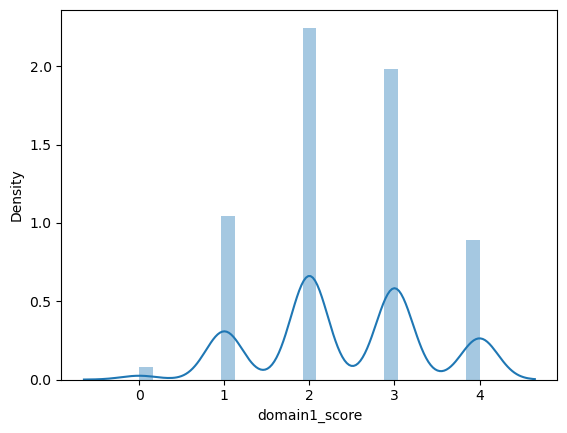

In [18]:
sns.distplot(df['domain1_score'])

In [20]:
df[df['essay_set']==5]['domain1_score']

0       2
1       2
2       3
3       1
4       3
       ..
1800    2
1801    0
1802    4
1803    3
1804    2
Name: domain1_score, Length: 1805, dtype: int64

In [21]:
min_range = [2,1,0,0,0,0,0,0]
max_range = [12,6,3,3,4,4,30,60]

def normalize(x,mi,ma):
    x = (x-mi)/(ma-mi)
    return round(x*10)

df['final_score']=df.apply(lambda x: normalize(x['domain1_score'], min_range[x['essay_set']-1], max_range[x['essay_set']-1]), axis=1)

In [22]:
df['final_score']

0        5
1        5
2        8
3        2
4        8
        ..
1800     5
1801     0
1802    10
1803     8
1804     5
Name: final_score, Length: 1805, dtype: int64

/var/folders/kn/gnm3d9hn21d8t3q08syhwsdw0000gp/T/ipykernel_6672/3249593394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['final_score'])


<Axes: xlabel='final_score', ylabel='Density'>

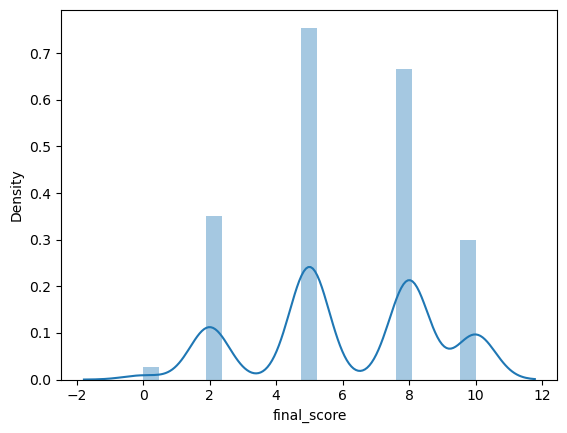

In [23]:
sns.distplot(df['final_score'])

In [24]:
df.skew()

essay_id         0.000000
essay_set        0.000000
domain1_score   -0.040572
final_score     -0.229983
dtype: float64

In [25]:
df.head()

,essay_id,essay_set,essay,domain1_score,final_score
0,1,5,"In this memoir of Narciso Rodriguez, @PERSON3'...",2,5
1,2,5,Throughout the excerpt from Home the Blueprint...,2,5
2,3,5,The mood the author created in the memoir is l...,3,8
3,4,5,The mood created by the author is showing how ...,1,2
4,5,5,The mood created in the memoir is happiness an...,3,8


In [26]:
df.describe()

,essay_id,essay_set,domain1_score,final_score
count,1805.000000,1805.0,1805.000000,1805.000000
mean,903.000000,5.0,2.408864,6.096953
std,521.202936,0.0,0.970821,2.657879
min,1.000000,5.0,0.000000,0.000000
25%,452.000000,5.0,2.000000,5.000000
50%,903.000000,5.0,2.000000,5.000000
75%,1354.000000,5.0,3.000000,8.000000
max,1805.000000,5.0,4.000000,10.000000


In [27]:
df.drop('domain1_score', axis=1, inplace=True)

In [28]:
df.head()

,essay_id,essay_set,essay,final_score
0,1,5,"In this memoir of Narciso Rodriguez, @PERSON3'...",5
1,2,5,Throughout the excerpt from Home the Blueprint...,5
2,3,5,The mood the author created in the memoir is l...,8
3,4,5,The mood created by the author is showing how ...,2
4,5,5,The mood created in the memoir is happiness an...,8


**Pre-Processing**

In [29]:
def clean_essay(essay):
    x = []
    for i in essay.split():
        if i.startswith("@"):
            continue
        else:
            x.append(i)
    return ' '.join(x)

df['essay'] = df['essay'].apply(lambda x: clean_essay(x))

In [30]:
stop_words = set(stopwords.words('english'))
def remove_stop_words(essay):
    word_tokens = word_tokenize(essay)
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)

df['clean_essay'] = df['essay'].apply(lambda x: remove_stop_words(x))

In [31]:
def remove_puncs(essay):
    essay = re.sub("[^A-Za-z ]", "", essay)
    return essay

df['clean_essay'] = df['clean_essay'].apply(lambda x: remove_puncs(x))

In [32]:
df.head()

,essay_id,essay_set,essay,final_score,clean_essay
0,1,5,"In this memoir of Narciso Rodriguez, life, the...",5,In memoir Narciso Rodriguez life mood contai...
1,2,5,Throughout the excerpt from Home the Blueprint...,5,Throughout excerpt Home Blueprints Our Lives ...
2,3,5,The mood the author created in the memoir is l...,8,The mood author created memoir love author fi...
3,4,5,The mood created by the author is showing how ...,2,The mood created author showing cuban s lived ...
4,5,5,The mood created in the memoir is happiness an...,8,The mood created memoir happiness gratitude N...


In [33]:
def sent2word(x):
    x = re.sub("[^A-Za-z0-9]", " ", x)
    words = nltk.word_tokenize(x)
    return words

def essay2word(essay):
    essay = essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw = tokenizer.tokenize(essay)
    final_words = []
    for i in raw:
        if len(i) > 0:
            final_words.append(sent2word(i))
    return final_words

def noOfWords(essay):
    count = 0
    for i in essay2word(essay):
        count = count + len(i)
    return count

def noOfChar(essay):
    count = 0
    for i in essay2word(essay):
        for j in i:
            count = count + len(j)
    return count

def avg_word_len(essay):
    return noOfChar(essay) / noOfWords(essay)

def noOfSent(essay):
    return len(essay2word(essay))

def count_pos(essay):
    sentences = essay2word(essay)
    noun_count = 0
    adj_count = 0
    verb_count = 0
    adverb_count = 0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if pos_tag[0] == 'N':
                noun_count += 1
            elif pos_tag[0] == 'V':
                verb_count += 1
            elif pos_tag[0] == 'J':
                adj_count += 1
            elif pos_tag[0] == 'R':
                adverb_count += 1
    return noun_count, verb_count, adj_count, adverb_count

data = open('big.txt').read()
words = re.findall('[a-z]+', data.lower())

def check_spell_error(essay):
    essay = essay.lower()
    new_essay = re.sub("[^A-Za-z0-9]", " ", essay)
    new_essay = re.sub("[0-9]", "", new_essay)
    count = 0
    all_words = new_essay.split()
    for i in all_words:
        if i not in words:
            count += 1
    return count

In [34]:
df.head()

,essay_id,essay_set,essay,final_score,clean_essay
0,1,5,"In this memoir of Narciso Rodriguez, life, the...",5,In memoir Narciso Rodriguez life mood contai...
1,2,5,Throughout the excerpt from Home the Blueprint...,5,Throughout excerpt Home Blueprints Our Lives ...
2,3,5,The mood the author created in the memoir is l...,8,The mood author created memoir love author fi...
3,4,5,The mood created by the author is showing how ...,2,The mood created author showing cuban s lived ...
4,5,5,The mood created in the memoir is happiness an...,8,The mood created memoir happiness gratitude N...


**Prep for ML**

In [35]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ibsrinivas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [36]:
pro_data = df.copy()
pro_data['char_count'] = pro_data['essay'].apply(noOfChar)
pro_data['word_count'] = pro_data['essay'].apply(noOfWords)
pro_data['sent_count'] = pro_data['essay'].apply(noOfSent)
pro_data['avg_word_len'] = pro_data['essay'].apply(avg_word_len)
pro_data['spell_err_count'] = pro_data['essay'].apply(check_spell_error)
pro_data['noun_count'], pro_data['adj_count'], pro_data['verb_count'], pro_data['adv_count'] = zip(*pro_data['essay'].map(count_pos))
pro_data.to_csv("Processed_data.csv")

In [37]:
prep_df = pd.read_csv("Processed_data.csv")
prep_df.drop('Unnamed: 0', inplace=True, axis=1)
prep_df.head()

,essay_id,essay_set,essay,final_score,clean_essay,char_count,word_count,sent_count,avg_word_len,spell_err_count,noun_count,adj_count,verb_count,adv_count
0,1,5,"In this memoir of Narciso Rodriguez, life, the...",5,In memoir Narciso Rodriguez life mood contai...,547,127,7,4.307087,5,29,28,4,3
1,2,5,Throughout the excerpt from Home the Blueprint...,5,Throughout excerpt Home Blueprints Our Lives ...,720,168,7,4.285714,11,37,31,14,12
2,3,5,The mood the author created in the memoir is l...,8,The mood author created memoir love author fi...,500,110,6,4.545455,6,34,19,9,4
3,4,5,The mood created by the author is showing how ...,2,The mood created author showing cuban s lived ...,307,73,3,4.205479,8,16,15,8,1
4,5,5,The mood created in the memoir is happiness an...,8,The mood created memoir happiness gratitude N...,535,126,8,4.246032,4,28,22,11,9


In [38]:
prep_df.shape

(1805, 14)

In [39]:
vectorizer = CountVectorizer(max_features=10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(prep_df['clean_essay'])
feature_names = vectorizer.get_feature_names_out()
X = count_vectors.toarray()
X_full = np.concatenate((prep_df.iloc[:, 5:].values, X), axis=1)
y_full = prep_df['final_score'].values
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3)